## Importing Necessary Libraries

In [2]:
# Preprocessing and Visualizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Importing Dataset

In [3]:
df = pd.read_csv("bodyfat.csv")

#### Taking a glance at the data

In [4]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### Checking For missing values

In [5]:
df.isnull().sum().sum()

0

#### Finding the number of Rows and Columns

In [6]:
df.shape

(252, 15)

## Exploratory Data Analysis

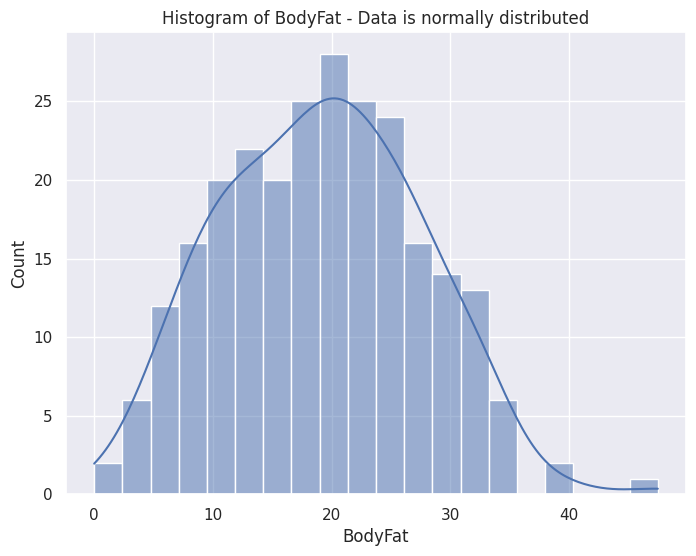

In [7]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BodyFat', bins=20, kde=True)

plt.title('Histogram of BodyFat - Data is normally distributed')
plt.xlabel('BodyFat')
plt.show()

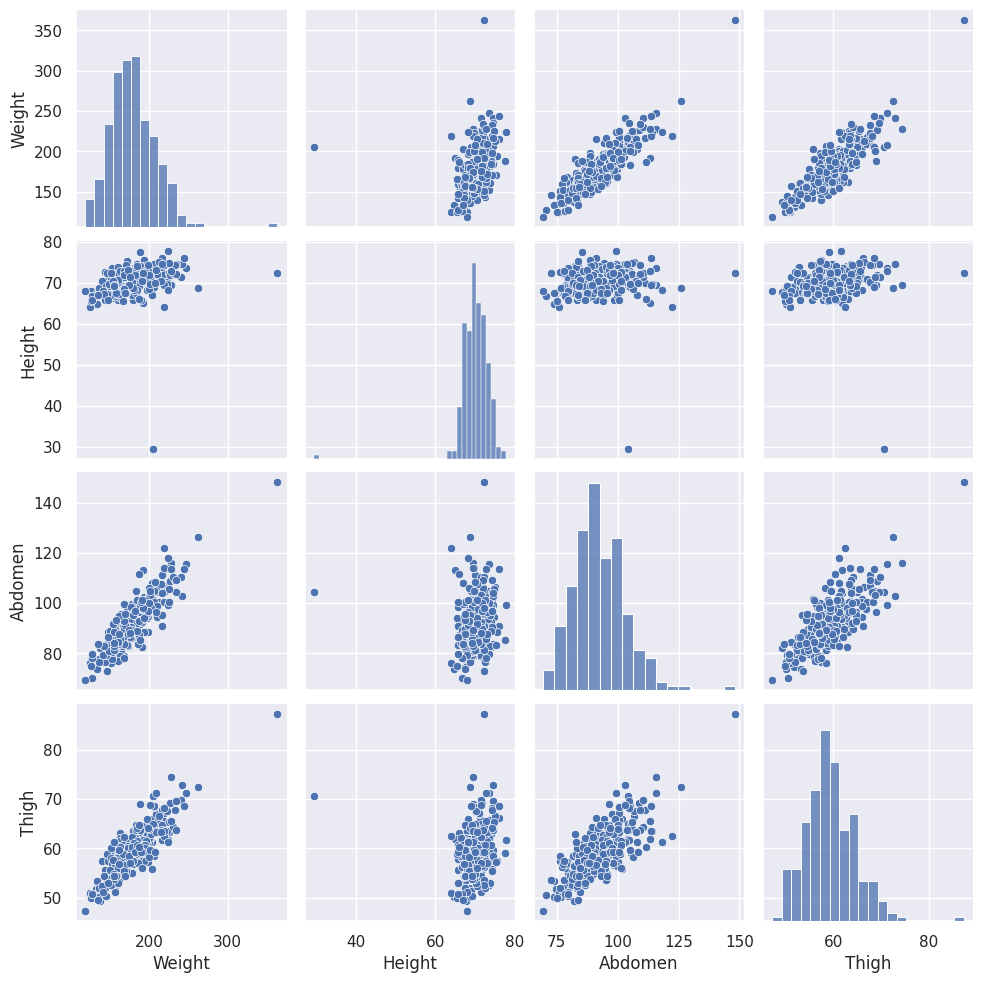

In [8]:
sns.pairplot(df[['Weight', 'Height', 'Abdomen', 'Thigh']])
plt.show()

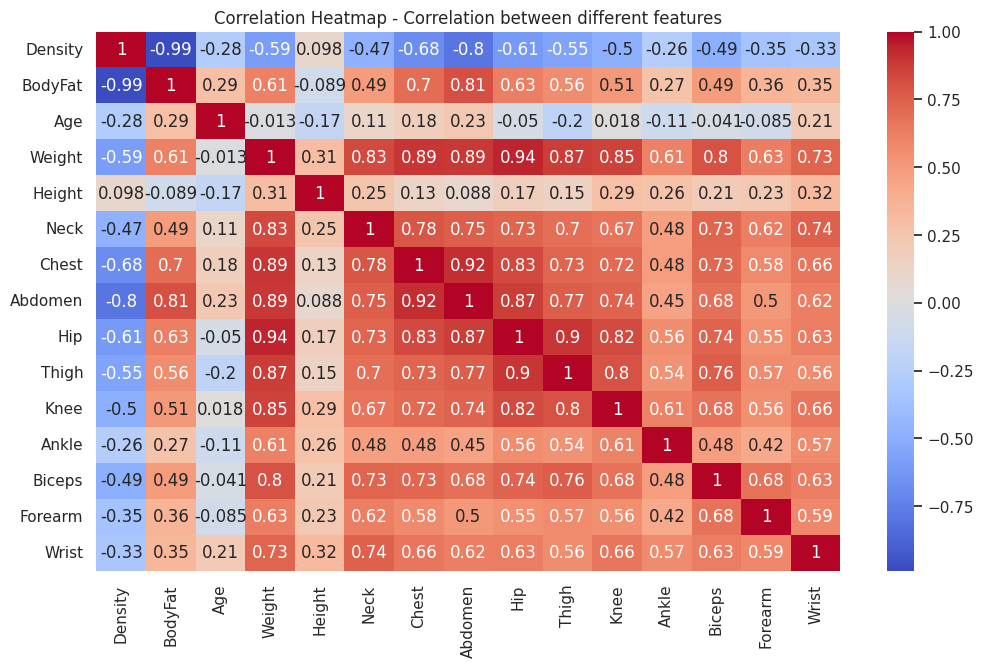

In [9]:
# Correlation heatmap

corr_matrix = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Correlation between different features')
plt.show()

#### BodyFat is highly correlated to Density, Chest circumference, Abdomen circumference & Weight, Hips circumference and Thighs circumference to some extent 

## Splitting the dataset (80/20 split)

In [10]:
y = df['BodyFat']
X = df.drop('BodyFat', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

#### Standardzing the data

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test) 

## Deep Learning Model

#### Making a sequential model with 3 hidden layers and 1 output layer

In [12]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train_scaled.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))

2023-09-04 10:34:04.483128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 10:34:04.497494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 10:34:04.497620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

#### Model Summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Defining Learning Rate and Compiling the Model with Adam optimizer

In [14]:
learning_rate = 0.1
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate),
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())

#### Running the model for 100 epochs and fitting it onto our data

In [15]:
epochs = 100
batch_size = 10
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size = batch_size, validation_split = 0.1)

Epoch 1/100
18/18 [==============================] - 1s 6ms/step - loss: 261.4048 - root_mean_squared_error: 16.1680 - val_loss: 81.9155 - val_root_mean_squared_error: 9.0507
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 99.4450 - root_mean_squared_error: 9.9722 - val_loss: 135.4216 - val_root_mean_squared_error: 11.6371
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 59.3037 - root_mean_squared_error: 7.7009 - val_loss: 108.1922 - val_root_mean_squared_error: 10.4015
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 20.7388 - root_mean_squared_error: 4.5540 - val_loss: 15.0068 - val_root_mean_squared_error: 3.8739
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 14.2209 - root_mean_squared_error: 3.7711

2023-09-04 10:34:08.926002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


18/18 [==============================] - 0s 2ms/step - loss: 7.3887 - root_mean_squared_error: 2.7182 - val_loss: 3.7665 - val_root_mean_squared_error: 1.9407
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 57.2749 - root_mean_squared_error: 7.5680 - val_loss: 450.4519 - val_root_mean_squared_error: 21.2239
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 70.8619 - root_mean_squared_error: 8.4180 - val_loss: 151.4811 - val_root_mean_squared_error: 12.3078
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 22.2388 - root_mean_squared_error: 4.7158 - val_loss: 27.9849 - val_root_mean_squared_error: 5.2901
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 7.4383 - root_mean_squared_error: 2.7273 - val_loss: 5.8912 - val_root_mean_squared_error: 2.4272
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 5.1906 - root_mean_squared_error: 2.2783 - val_loss: 3.8053 - val_root_me

In [17]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, batch_size=batch_size)
print("RMSE:", loss)

6/6 [==============================] - 0s 851us/step - loss: 5.2484 - root_mean_squared_error: 2.2909
RMSE: 5.248425006866455
